In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [36]:
# read json file as pandas dataframe
data = pd.read_json("../data/trades.json")
data.set_index('timestamp', inplace=True)
data["costs"] = data["price"] * data["quantity"]


In [37]:
data.head(5)

,buyer,seller,symbol,currency,price,quantity,costs
timestamp,,,,,,,
0,SUBMISSION,,STARFRUIT,SEASHELLS,5043,20,100860
100,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1,10002
100,,,STARFRUIT,SEASHELLS,5042,1,5042
200,,SUBMISSION,AMETHYSTS,SEASHELLS,10003,1,10003
200,,,STARFRUIT,SEASHELLS,5043,1,5043


In [47]:
amethysts = data[data['symbol'] == 'AMETHYSTS']
amethysts['position'] = amethysts.apply(lambda row: row['quantity'] if row['buyer'] == 'SUBMISSION' else -row['quantity'] if row['seller'] == 'SUBMISSION' else 0, axis=1)
amethysts['position'] = amethysts['position'].cumsum()

starfruit = data[data['symbol'] == 'STARFRUIT']
starfruit['position'] = starfruit.apply(lambda row: row['quantity'] if row['buyer'] == 'SUBMISSION' else -row['quantity'] if row['seller'] == 'SUBMISSION' else 0, axis=1)
starfruit['position'] = starfruit['position'].cumsum()

/var/folders/jr/fcv62ks54c3_4qfwxdfv0hdm0000gn/T/ipykernel_57743/3325659955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amethysts['position'] = amethysts.apply(lambda row: row['quantity'] if row['buyer'] == 'SUBMISSION' else -row['quantity'] if row['seller'] == 'SUBMISSION' else 0, axis=1)
/var/folders/jr/fcv62ks54c3_4qfwxdfv0hdm0000gn/T/ipykernel_57743/3325659955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amethysts['position'] = amethysts['position'].cumsum()
/var/folders/jr/fcv62ks54c3_4q

In [48]:
sold_AMETHYSTS = amethysts[amethysts['seller'] == 'SUBMISSION']
bought_AMETHYSTS = amethysts[amethysts['buyer'] == 'SUBMISSION']
sold_STARFRUIT = starfruit[starfruit['seller'] == 'SUBMISSION']
bought_STARFRUIT = starfruit[starfruit['buyer'] == 'SUBMISSION']

In [49]:
# get trade volume for each day
iterations = (data.index.max() - data.index.min()) // 100
amethysts_volume = amethysts["quantity"].sum() / iterations
starfruit_volume = starfruit["quantity"].sum() / iterations

In [50]:
print(f"Trading Iterations: {iterations}")
print(f"Average Amethysts Trading Volume per day: {amethysts_volume}")
print(f"Average Starfruit Trading Volume per day: {starfruit_volume}")

print("Amethysts:")
print(f"# Our daily trading volume: {(sold_AMETHYSTS['quantity'].sum() + bought_AMETHYSTS['quantity'].sum()) / iterations}")
print(f"# Bought: {bought_AMETHYSTS['quantity'].sum()} for a price of average {bought_AMETHYSTS['price'].mean()}. Total Costs: {bought_AMETHYSTS['costs'].sum()}")
print(f"# Bought Price Range: {bought_AMETHYSTS['price'].min()} - {bought_AMETHYSTS['price'].max()}")
print(f"# Sold: {sold_AMETHYSTS['quantity'].sum()} for a price of average {sold_AMETHYSTS['price'].mean()}. Total Costs: {sold_AMETHYSTS['costs'].sum()}")
print(f"# Sold Price Range: {sold_AMETHYSTS['price'].min()} - {sold_AMETHYSTS['price'].max()}")
amethysts_quantity = bought_AMETHYSTS['quantity'].sum() - sold_AMETHYSTS['quantity'].sum()
amethysts_profit = sold_AMETHYSTS['costs'].sum() - bought_AMETHYSTS['costs'].sum()
amethysts_mid_price = 10001.0
amethysts_profit += (amethysts_quantity * amethysts_mid_price)
print(f"# End day with quantity: {amethysts_quantity}. Need to sell/buy for {amethysts_mid_price}")
print(f"# Profit of {amethysts_profit}")

print("STARFRUIT:")
print(f"# Our daily trading volume: {(sold_STARFRUIT['quantity'].sum() + bought_STARFRUIT['quantity'].sum()) / iterations}")
print(f"# Bought: {bought_STARFRUIT['quantity'].sum()} for a price of average {bought_STARFRUIT['price'].mean()}. Total Costs: {bought_STARFRUIT['costs'].sum()}")
print(f"# Bought Price Range: {bought_STARFRUIT['price'].min()} - {bought_STARFRUIT['price'].max()}")
print(f"# Sold: {sold_STARFRUIT['quantity'].sum()} for a price of average {sold_STARFRUIT['price'].mean()}. Total Costs: {sold_STARFRUIT['costs'].sum()}")
print(f"# Sold Price Range: {sold_STARFRUIT['price'].min()} - {sold_STARFRUIT['price'].max()}")
startfruit_quantity = bought_STARFRUIT['quantity'].sum() - sold_STARFRUIT['quantity'].sum()
startfuit_profit = sold_STARFRUIT['costs'].sum() - bought_STARFRUIT['costs'].sum()
startfruit_mid_price = 5050.5
startfuit_profit += (startfruit_quantity * startfruit_mid_price)
print(f"# End day with quantity: {startfruit_quantity}. Need to sell/buy for {startfruit_mid_price}")
print(f"# Profit of {startfuit_profit}")

print(f"Total Profit: {amethysts_profit + startfuit_profit}")

Trading Iterations: 999
Average Amethysts Trading Volume per day: 0.8958958958958959
Average Starfruit Trading Volume per day: 1.0560560560560561
Amethysts:
# Our daily trading volume: 0.7097097097097097
# Bought: 353 for a price of average 9997.709677419354. Total Costs: 3529168
# Bought Price Range: 9996 - 10000
# Sold: 356 for a price of average 10002.324137931035. Total Costs: 3560856
# Sold Price Range: 10000 - 10004
# End day with quantity: -3. Need to sell/buy for 10001.0
# Profit of 1685.0
STARFRUIT:
# Our daily trading volume: 0.7737737737737738
# Bought: 383 for a price of average 5039.968421052631. Total Costs: 1930560
# Bought Price Range: 5027 - 5058
# Sold: 390 for a price of average 5044.811023622047. Total Costs: 1967310
# Sold Price Range: 5032 - 5063
# End day with quantity: -7. Need to sell/buy for 5050.5
# Profit of 1396.5
Total Profit: 3081.5


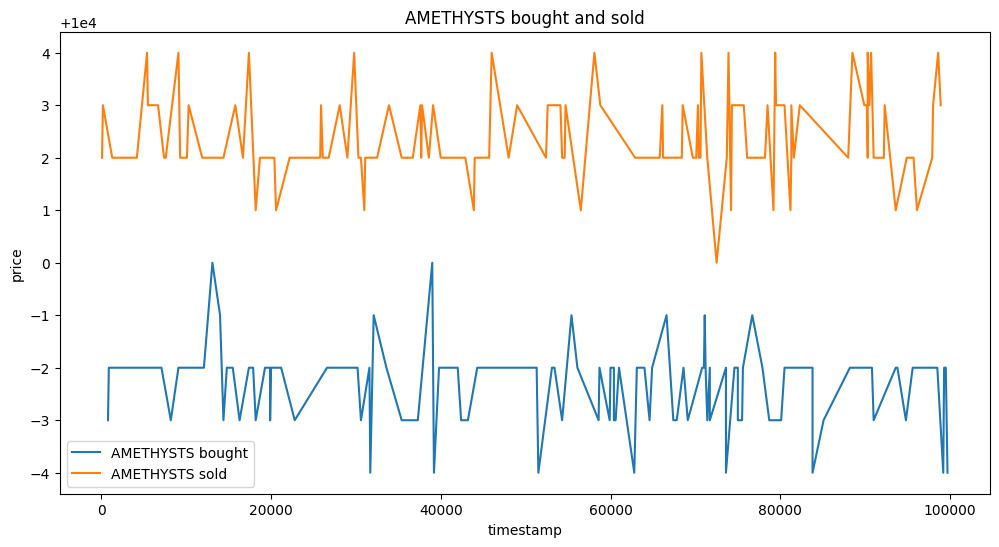

In [51]:
# draw a plot of the price by timestamp for amethysts bought and sold
plt.figure(figsize=(12, 6))
plt.plot(bought_AMETHYSTS.index, bought_AMETHYSTS['price'], label='AMETHYSTS bought')
plt.plot(sold_AMETHYSTS.index, sold_AMETHYSTS['price'], label='AMETHYSTS sold')
plt.legend()
plt.title('AMETHYSTS bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()


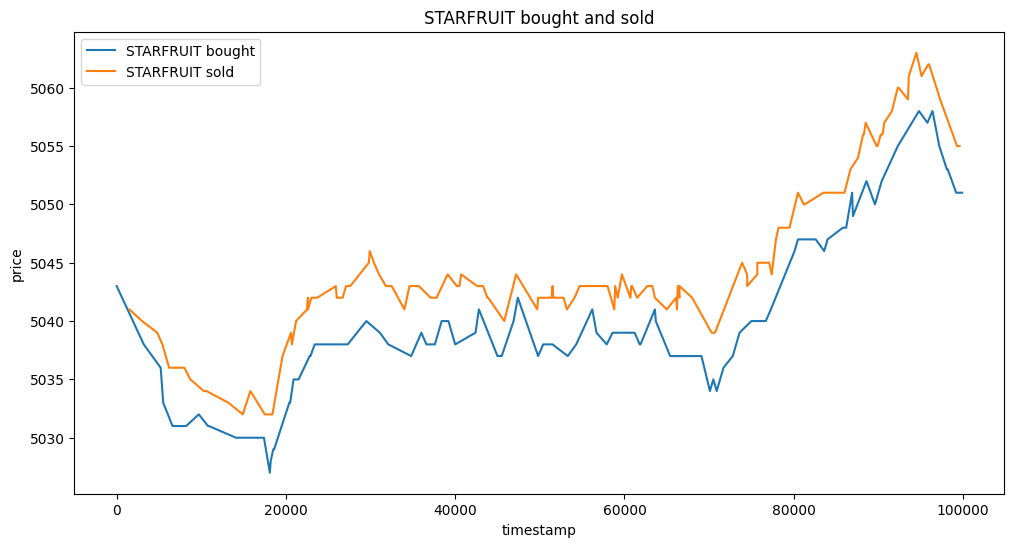

In [52]:
# same for starfruit
plt.figure(figsize=(12, 6))
plt.plot(bought_STARFRUIT.index, bought_STARFRUIT['price'], label='STARFRUIT bought')
plt.plot(sold_STARFRUIT.index, sold_STARFRUIT['price'], label='STARFRUIT sold')
plt.legend()
plt.title('STARFRUIT bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()


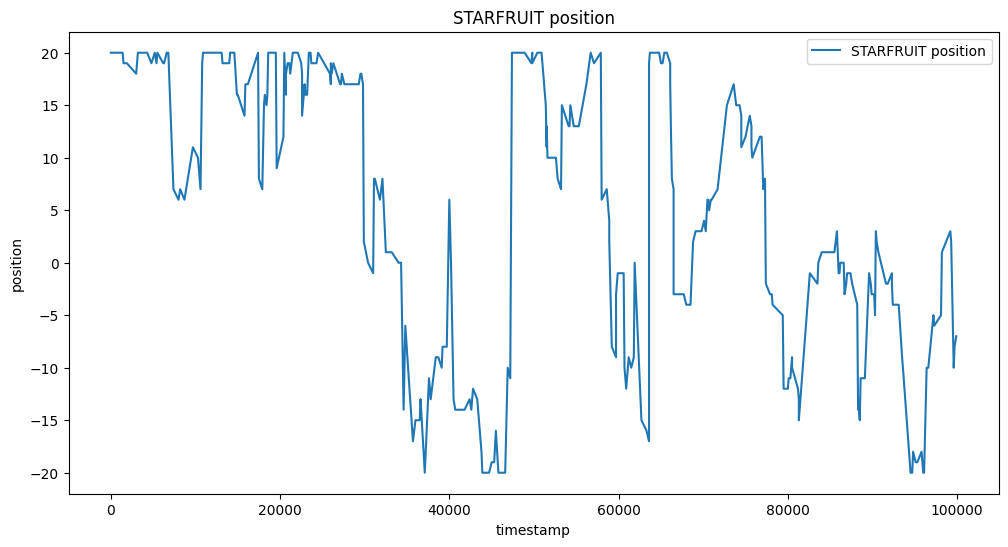

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(starfruit.index, starfruit['position'], label='STARFRUIT position')
plt.legend()
plt.title('STARFRUIT position')
plt.xlabel('timestamp')
plt.ylabel('position')
plt.show()

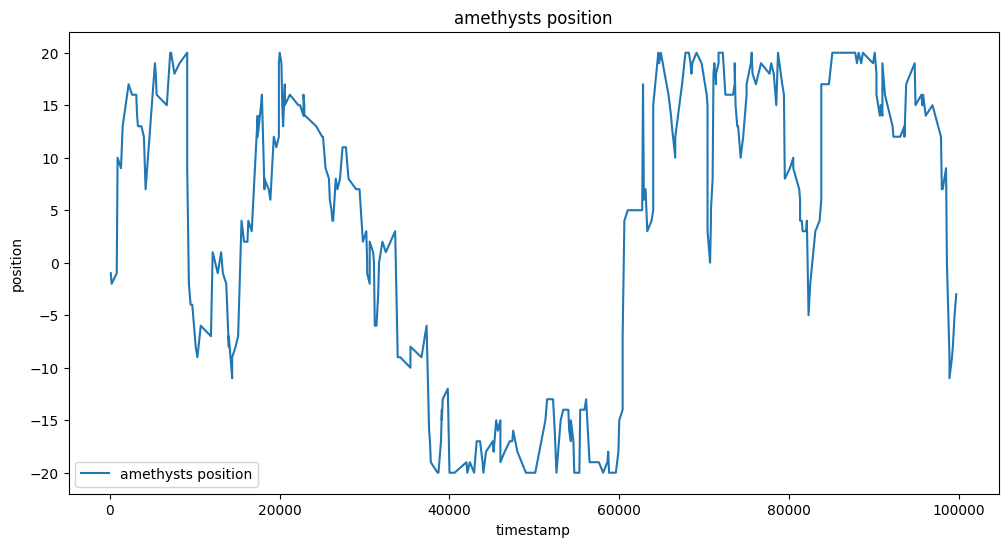

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(amethysts.index, amethysts['position'], label='amethysts position')
plt.legend()
plt.title('amethysts position')
plt.xlabel('timestamp')
plt.ylabel('position')
plt.show()